# Project Overview

This project aims to analyze and identify the relationship between Gross Domestic Product (GDP) of a country and Life Expectancy at Birth of its citizens six countries. 

The data consists of annual records from the World Bank and the World Health Organization for six countries over a span of 16 years. The project will investigate if there is a strong correlation between economic growth (represented by GDP) and life expectancy.

## Import Python Modules and loading the data

First we import the preliminary modules that will be used in this project and load the datasets into DataFrames:

In [38]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler


all_data = pd.read_csv("all_data.csv")

print(all_data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


To check the shape of the DataFrame, including its observations and columns:

In [40]:
print(len(all_data.columns))

print(len(all_data))

4
96


## Exploring the Data

First, more needs to be explored about the dataset, especially the countries that are represented in the DataFrame:

In [42]:
print(all_data.info())

print(all_data.nunique())

print(all_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
Country                              6
Year                                16
Life expectancy at birth (years)    69
GDP                                 96
dtype: int64
              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.0000

## Removing Missing Data

Next step is to remove missing values:

In [44]:
print(all_data.describe(include='all'))

print(all_data.isnull().sum())

print(all_data[all_data.isnull().any(axis=1)])

all_data.rename(columns={'Life expectancy at birth (years)': 'Life_expectancy'},inplace=True)

all_data['Life_expectancy'].dropna(inplace=True)

print(all_data.head())

       Country         Year  Life expectancy at birth (years)           GDP
count       96    96.000000                         96.000000  9.600000e+01
unique       6          NaN                               NaN           NaN
top      Chile          NaN                               NaN           NaN
freq        16          NaN                               NaN           NaN
mean       NaN  2007.500000                         72.789583  3.880499e+12
std        NaN     4.633971                         10.672882  5.197561e+12
min        NaN  2000.000000                         44.300000  4.415703e+09
25%        NaN  2003.750000                         74.475000  1.733018e+11
50%        NaN  2007.500000                         76.750000  1.280220e+12
75%        NaN  2011.250000                         78.900000  4.067510e+12
max        NaN  2015.000000                         81.000000  1.810000e+13
Country                             0
Year                                0
Life expecta

In [45]:
print(all_data.columns)

print(all_data.head())

Index(['Country', 'Year', 'Life_expectancy', 'GDP'], dtype='object')
  Country  Year  Life_expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


## Exploratory Data Analysis

Now, let's explore the dataset, starting with the central tendency of Life expectancy:

In [47]:
print(all_data.Life_expectancy.mean())

print(all_data.Life_expectancy.median())

print(all_data.Life_expectancy.mode())

72.78958333333334
76.75
0    75.0
Name: Life_expectancy, dtype: float64


### Exploratory Plots

Exploratory plots can be helpful in visualizing the distribution of *Life_expectancy* column:

C:\Users\Kartik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


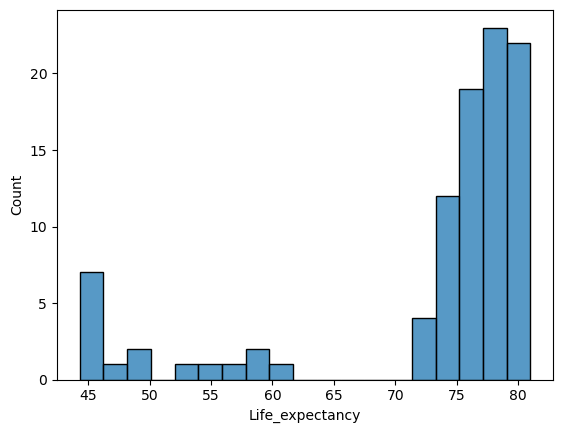

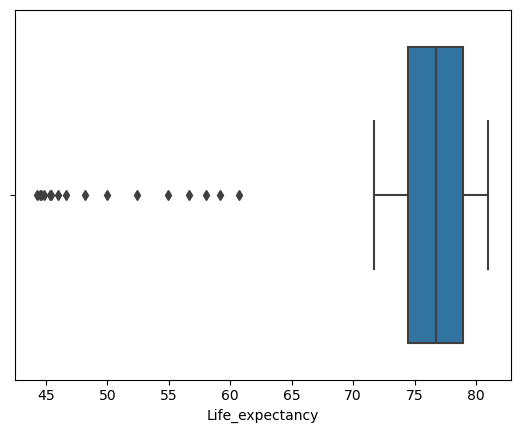

In [49]:
sns.histplot(x='Life_expectancy', data=all_data)
plt.show()
plt.close()

sns.boxplot(x='Life_expectancy', data=all_data)
plt.show()
plt.close()

The below column chart shows the number of values for each country.

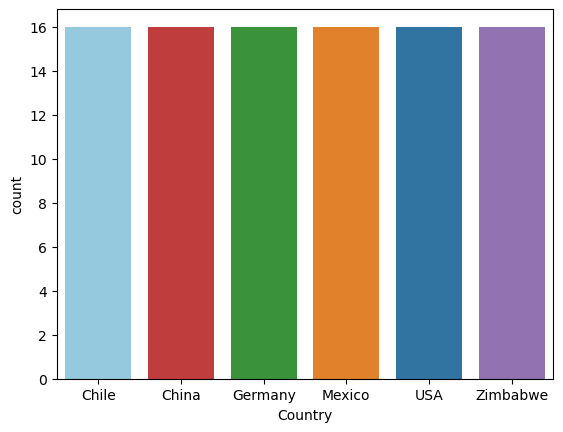

<Figure size 640x480 with 0 Axes>

In [51]:
palette = { 
    'Chile': '#87CEEB',  # Blue
    'China': '#d62728',  # Red
    'Germany': '#2ca02c',  # Green
    'Mexico': '#ff7f0e',  # Orange
    'United States of America': '#1f77b4',  # Dark Blue
    'Zimbabwe': '#9467bd'  # Purple
}

sns.countplot(x='Country', data=all_data, palette=palette)
ax = plt.subplot()
ax.set_xticklabels(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'])
plt.show()
plt.clf()

#### GDP Trend

We now visualize GDP trend of all six countries over years. 

In [53]:
GDP_chile = all_data.GDP[all_data.Country == 'Chile']

GDP_china = all_data.GDP[all_data.Country == 'China']

GDP_germany = all_data.GDP[all_data.Country == 'Germany']

GDP_mexico = all_data.GDP[all_data.Country == 'Mexico']

GDP_usa = all_data.GDP[all_data.Country == 'United States of America']

GDP_zimbabwe = all_data.GDP[all_data.Country == 'Zimbabwe']


Life_expectancy_chile = all_data.Life_expectancy[all_data.Country == 'Chile']

Life_expectancy_china = all_data.Life_expectancy[all_data.Country == 'China']

Life_expectancy_germany = all_data.Life_expectancy[all_data.Country == 'Germany']

Life_expectancy_mexico = all_data.Life_expectancy[all_data.Country == 'Mexico']

Life_expectancy_usa = all_data.Life_expectancy[all_data.Country == 'United States of America']

Life_expectancy_zimbabwe = all_data.Life_expectancy[all_data.Country == 'Zimbabwe']

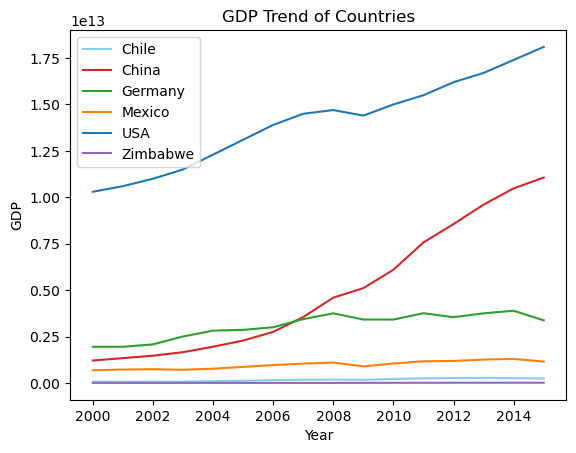

In [54]:
# Filter Year data for each country
years_chile = all_data.Year[all_data.Country == 'Chile']
years_china = all_data.Year[all_data.Country == 'China']
years_germany = all_data.Year[all_data.Country == 'Germany']
years_mexico = all_data.Year[all_data.Country == 'Mexico']
years_usa = all_data.Year[all_data.Country == 'United States of America']
years_zimbabwe = all_data.Year[all_data.Country == 'Zimbabwe']

# Plot each country's GDP against its corresponding years
plt.plot(years_chile, GDP_chile, color='#87CEEB', label='Chile')
plt.plot(years_china, GDP_china, color='#d62728', label='China')
plt.plot(years_germany, GDP_germany, color='#2ca02c', label='Germany')
plt.plot(years_mexico, GDP_mexico, color='#ff7f0e', label='Mexico')
plt.plot(years_usa, GDP_usa, color='#1f77b4', label='USA')
plt.plot(years_zimbabwe, GDP_zimbabwe, color='#9467bd', label='Zimbabwe')

plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Trend of Countries')

plt.legend()
plt.show()
plt.close()


#### GDP Distribution by Country

We now visualize the distribution of GDP of all six countries.

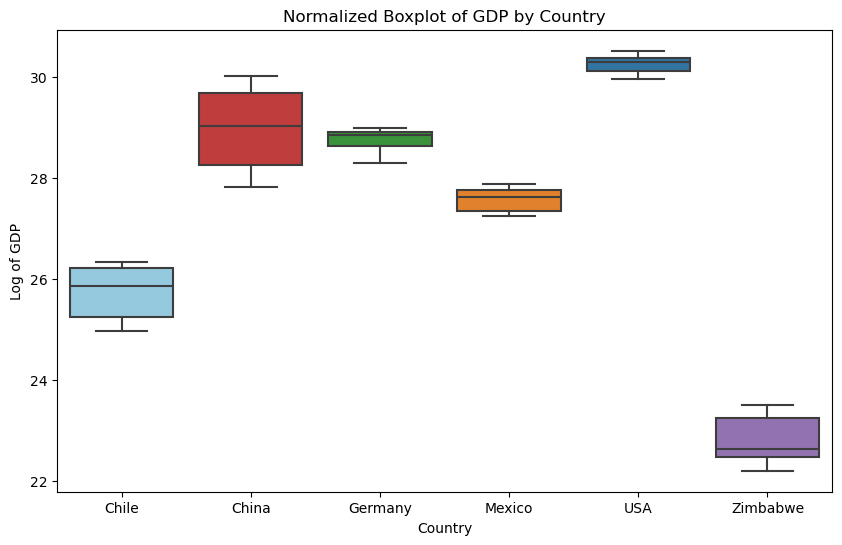

In [56]:
all_data['Log_GDP'] = np.log(all_data['GDP'])

palette = { 
    'Chile': '#87CEEB',  # Blue
    'China': '#d62728',  # Red
    'Germany': '#2ca02c',  # Green
    'Mexico': '#ff7f0e',  # Orange
    'United States of America': '#1f77b4',  # Dark Blue
    'Zimbabwe': '#9467bd'  # Purple
}


# Create a boxplot for each country using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Log_GDP', data=all_data, palette=palette)

plt.title('Normalized Boxplot of GDP by Country')
plt.xlabel('Country')
ax = plt.subplot()
ax.set_xticklabels(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'])
plt.ylabel('Log of GDP')
plt.show()
plt.close()

#### Life Expectancy Trend

We now visualize life expectancy trend of countries over years.

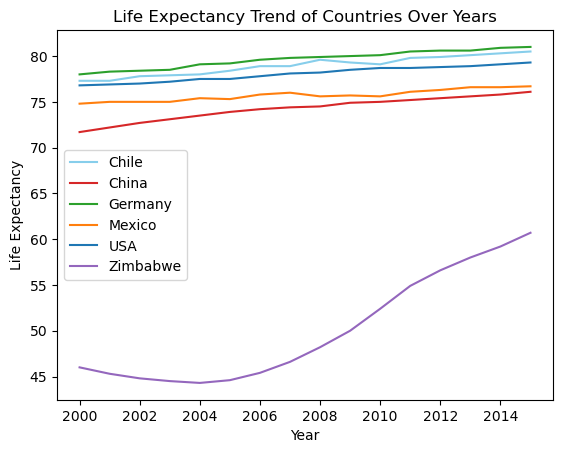

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [58]:
# Plot each country's Life Expectancy against its corresponding years
plt.plot(years_chile, Life_expectancy_chile, color='#87CEEB', label='Chile')
plt.plot(years_china, Life_expectancy_china, color='#d62728', label='China')
plt.plot(years_germany, Life_expectancy_germany, color='#2ca02c', label='Germany')
plt.plot(years_mexico, Life_expectancy_mexico, color='#ff7f0e', label='Mexico')
plt.plot(years_usa, Life_expectancy_usa, color='#1f77b4', label='USA')
plt.plot(years_zimbabwe, Life_expectancy_zimbabwe, color='#9467bd', label='Zimbabwe')

plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Trend of Countries Over Years')

plt.legend()
plt.show()
plt.close

#### Life expectancy Distribution by Country

We now visualize the distribution of life expectancy of all six countries.

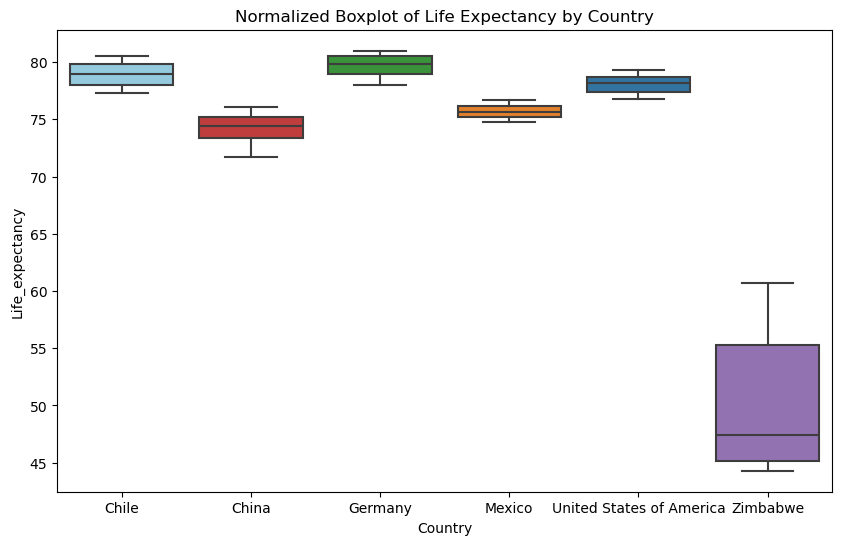

In [73]:
palette = { 
    'Chile': '#87CEEB',  # Blue
    'China': '#d62728',  # Red
    'Germany': '#2ca02c',  # Green
    'Mexico': '#ff7f0e',  # Orange
    'United States of America': '#1f77b4',  # Dark Blue
    'Zimbabwe': '#9467bd'  # Purple
}

plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Life_expectancy', data=all_data, palette=palette)
plt.title('Normalized Boxplot of Life Expectancy by Country')
plt.xlabel('Country')
ax = plt.subplot
plt.show()
plt.close()

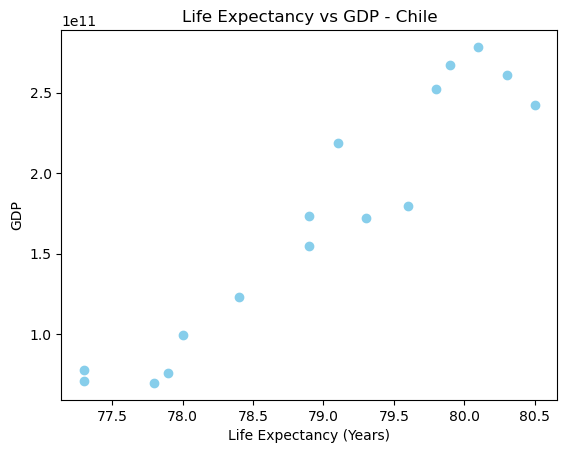

In [75]:
plt.scatter(x=Life_expectancy_chile, y=GDP_chile, color='#87CEEB', label='Chile')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('GDP')
plt.title('Life Expectancy vs GDP - Chile')
plt.show()
plt.close()

## Plotting the relationship between Life Expectancy and GDP

First, we plot the relationship between Life Expectancy and GDP for China:

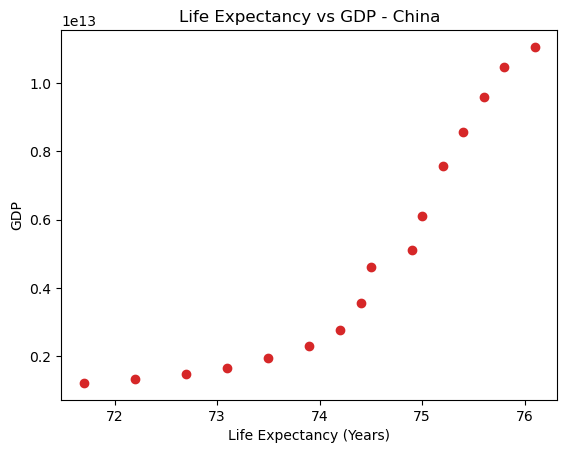

In [77]:
plt.scatter(x=Life_expectancy_china, y=GDP_china, color='#d62728', label='China')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('GDP')
plt.title('Life Expectancy vs GDP - China')
plt.show()
plt.close()

We now plot the relationship between Life Expectancy and GDP for Germany:

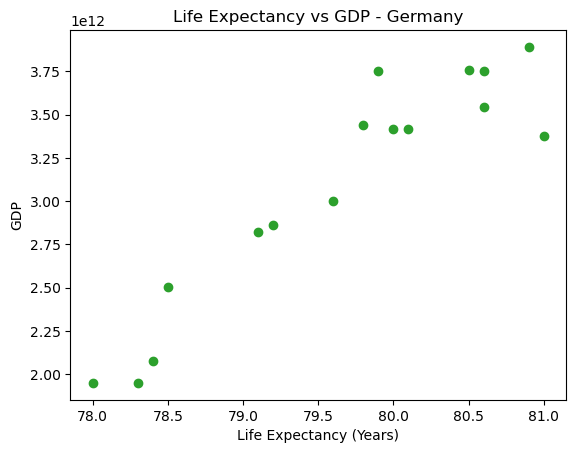

In [79]:
plt.scatter(x=Life_expectancy_germany, y=GDP_germany, color='#2ca02c')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('GDP')
plt.title('Life Expectancy vs GDP - Germany')
plt.show()
plt.close()

Next plot the relationship between Life Expectancy and GDP for Mexico:

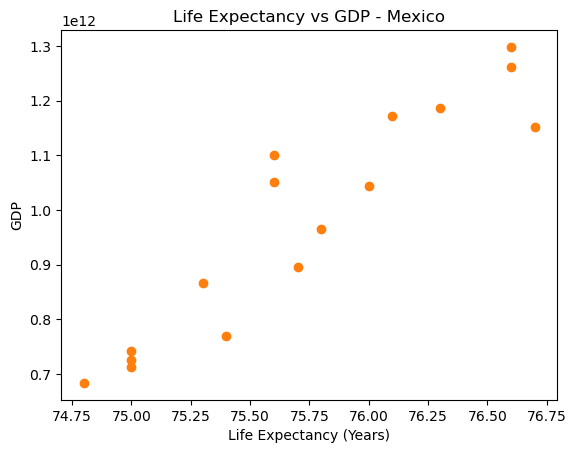

In [81]:
plt.scatter(x=Life_expectancy_mexico, y=GDP_mexico, color='#ff7f0e')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('GDP')
plt.title('Life Expectancy vs GDP - Mexico')
plt.show()
plt.close()

Next, we plot the relationship between Life Expectancy and GDP for USA:

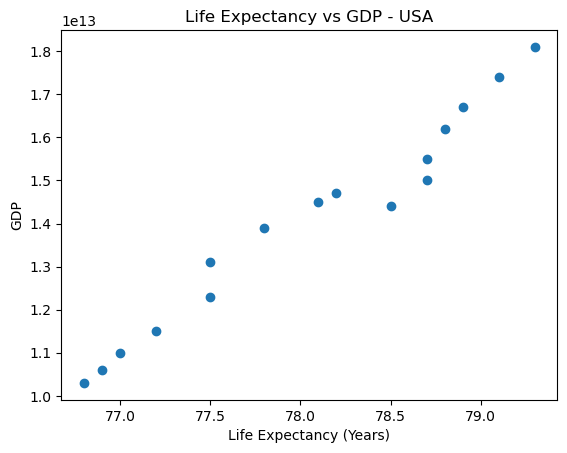

In [83]:
plt.scatter(x=Life_expectancy_usa, y=GDP_usa, color='#1f77b4')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('GDP')
plt.title('Life Expectancy vs GDP - USA')
plt.show()
plt.close()

Lastly, we plot the relationship between Life Expectancy and GDP for Zimbabwe:

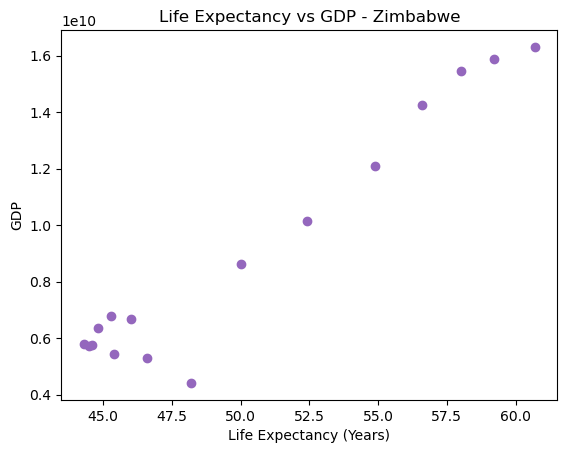

In [85]:
plt.scatter(x=Life_expectancy_zimbabwe, y=GDP_zimbabwe, color='#9467bd')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('GDP')
plt.title('Life Expectancy vs GDP - Zimbabwe')
plt.show()
plt.close()